In [1]:
from math import cos, sin

def fx(t, xvn, yvn, a):
    return a*(cos(t) ** 2 * sin(t) + 2*cos(t) - (2 + xvn * yvn)*xvn) - yvn

def fy(t, xvn, yvn, a):
    return xvn + yvn - sin(t)

def fx2(t):
    return cos(t)

def fy2(t):
    return sin(t)

In [2]:
from scipy import optimize
"""Неявный метод Эйлера 1-го порядка"""
def implicit2_method(T, xvn, yvn, t, ak):
    a = [[0, 0],
         [1/2, 1/2]]
    c = [1/2]
    b = [1/2, 1/2]
    
    k1 = [T * fx(t, xvn, yvn, ak), T * fy(t, xvn, yvn, ak)]
    #0 0 0
    #1 1/2 1/2
    #0 1/2 1/2
    # kx1
    def fk(x):
        # x = k2
        xn = [xvn + a[1][0] * k1[0] + a[1][1] * x[0], xvn + a[1][0] * k1[0] + a[1][1] * x[0]]
        yn = [yvn + a[1][0] * k1[1] + a[1][1] * x[1], yvn + a[1][0] * k1[1] + a[1][1] * x[1]]
        return [T * fx(t + c[0] * T, xn[0], yn[0], ak) - x[0],
              T * fy(t + c[0] * T, xn[1], yn[1], ak) - x[1],]

    # -a(2xvn + xvn ** 2 * yvn) - yvn
    def jac_fk(x):        
        xn = [xvn + a[1][0] * k1[0] + a[1][1] * x[0], xvn + a[1][0] * k1[0] + a[1][1] * x[0]]
        yn = [yvn + a[1][0] * k1[1] + a[1][1] * x[1], yvn + a[1][0] * k1[1] + a[1][1] * x[1]]
        return [[-ak * (2 * xn[0] * yn[0] * a[1][1] + 2 * a[1][1]) * T - 1, (-ak * xn[0] * xn[0] - 1 * a[1][1]) * T],
                [T * 1 * a[1][1], T * 1 * a[1][1] - 1]]

    sol = optimize.root(fun=fk, x0=[T * fx(t, xvn, yvn, ak), T * fy(t, xvn, yvn, ak)],
                    jac=jac_fk, method='hybr')
    xn2 = xvn + b[0] * k1[0] + b[1] * sol.x[0]
    yn2 = yvn + b[0] * k1[1] + b[1] * sol.x[1]
    return (xn2, yn2)

Kraaijevanger and Spijker's two-stage Diagonally Implicit Runge–Kutta method


In [3]:
# from scipy import optimize
# def implicit2_diag_method(T, xvn, yvn, t, ak):
#     a = [[0, 0],
#          [1/2, 1/2]]
#     c = [1/2, 3/2]
#     b = [-1/2, 3/2]
    
#     ky1 = T * fy(t + c[0] * T, xvn, yvn, ak)
#     #0 0 0
#     #1 1/2 1/2
#     #0 1/2 1/2
#     # kx1
#     def fk(x):
#         # x = kx1, kx2, ky2
#         xn_ex = xvn + a[0][1] * x[0]
#         xn = [xvn + a[1][0] * x[0] + a[1][1] * x[1], xvn + a[1][0] * x[0] + a[1][1] * x[1]]
#         yn = [yvn + a[1][0] * ky1 + a[1][1] * x[2], yvn + a[1][0] * ky1 + a[1][1] * x[2]]
#         return [T * fx(t + c[0] * T, xn_ex, yvn, ak),
#                 T * fx(t + c[1] * T, xn[0], yn[0], ak) - x[0],
#                 T * fy(t + c[1] * T, xn[1], yn[1], ak) - x[1],]

#     # -a(2xvn + xvn ** 2 * yvn) - yvn
#     def jac_fk(x):
#         # x = kx1, kx2, ky2
#         xn_ex = xvn + a[0][1] * x[0]
#         xn = [xvn + a[1][0] * x[0] + a[1][1] * x[1], xvn + a[1][0] * x[0] + a[1][1] * x[1]]
#         yn = [yvn + a[1][0] * ky1 + a[1][1] * x[2], yvn + a[1][0] * ky1 + a[1][1] * x[2]]
#         return [[-ak * (2 * xn_ex * yvn * a[1][1] + 2 * a[1][1]) * T - 1, 0, (-ak * xn[0] * xn[0] - 1 * a[1][1]) * T],
#                 [-ak * (2 * xn[0] * yn[0] * a[1][1] + 2 * a[1][1]) * T - 1,  , (-ak * xn[0] * xn[0] - 1 * a[1][1]) * T],
#                 [T * 1 * a[1][1], T * 1 * a[1][1] - 1]]

#     sol = optimize.root(fun=fk, x0=[0, 0, 0],
#                     jac=jac_fk, method='hybr')
#     xn2 = xvn + b[0] * sol.x[0] + b[1] * sol.x[1]
#     yn2 = yvn + b[0] * ky1 + b[1] * sol.x[2]
#     return (xn2, yn2)

In [4]:
from scipy import optimize
"""Неявный метод Эйлера 1-го порядка"""
def implicit_method(T, xvn, yvn, t, a):
        def fk(x):
                return [T * fx(t, x[0], x[1], a) - x[0] + xvn,
                        T * fy(t, x[0], x[1], a) - x[1] + yvn]

# return 10(cos(t) ** 2 sin(t) + 2cos(t) - (2 + xvn yvn)*xvn) - yvn
        def jac_fk(x):
                return [[-a * (x[0] * x[1] + 2) * T - 1, (-a * x[0] * x[0] - 1) * T],
                                [T * 1, T * 1 - 1]]

        sol = optimize.root(fun=fk, x0=[0, 0],
                        jac=jac_fk, method='hybr')
        return (sol.x[0], sol.x[1])

In [5]:
def do_method(method, t_start, t_finish, array, variables, dynamic_step: bool=True):
    T, a = [i for i in variables]
    tl = [t_start]
    array_dif = [(fx(tl[-1], array[-1][0], array[-1][1], a),
                    fy(tl[-1], array[-1][0], array[-1][1], a))]
    while tl[-1] <= t_finish:
        array.append(method(T, array[-1][0], array[-1][1], tl[-1], a))
        array_dif.append((fx(tl[-1], array[-1][0], array[-1][1], a),
                fy(tl[-1], array[-1][0], array[-1][1], a)))
        tl.append(tl[-1] + T)
    return (tl, array, array_dif)

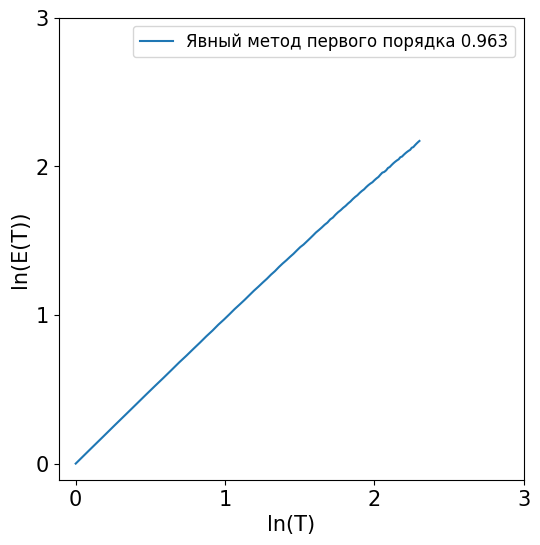

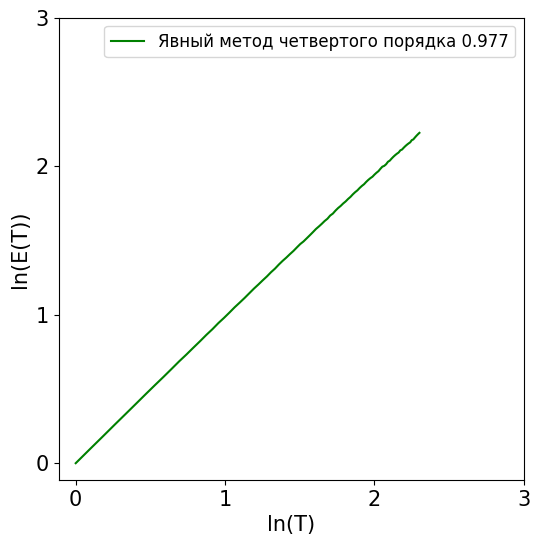

In [18]:
import math
from statistics import mean
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np
from num_methods import Solver2
from drawing import draw

def f(T_in):
    T = T_in
    # T = 0.001
    t_start = 0
    t_finish = 5
    a = 10
    # Первый элемент это x, второй y
    variables = (T, a)
    # array0 = [(2, 0)]
    
    lst =  (fx2(t), fy2(t))
    sol = Solver2((fx, fy), [a], lst, (t_start, t_finish))
    # array1 = do_method(explicit_method, t_start, t_finish, [lst], variables, False)
    array3 = do_method(implicit_method, t_start, t_finish, [lst], variables, False)
    # array1 = sol.do_method(sol.explicit4_method, T, False)
    # array2 = do_method(implicit2_method, t_start, t_finish, [lst], variables, False)
    array2 = sol.do_method(sol.explicit4_method, T, False)
    # array2 = sol.do_method(explicit4_method, t_start, t_finish, [lst], variables, False)
    array1 = sol.do_method(sol.explicit1_method, T, False)
    # array3 = do_method(explicit4_method, t_start, t_finish, [lst], variables, False)
    # array3 = do_method(implicit_method, t_start, t_finish, [lst], variables, False)
    arrayx1 = [i[0] for i in array1[1]]
    arrayy1 = [i[1] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    arrayx3 = [i[0] for i in array3[1]]
    arrayy3 = [i[1] for i in array3[1]]
    # arrayx4 = [i[0] for i in array3[1]]
    # arrayy4 = [i[1] for i in array3[1]]
    # print(len(array1[0]), len(array2[0]), len(array3[0]))
    max_dif = [0, 0, 0]
    tl = array2[0]
    for i in range(len(array1[0])):
        real_x = fx2(tl[i])
        real_y = fy2(tl[i])
        max_dif[0] = max(max_dif[0], abs(arrayx1[i] - real_x))
        max_dif[0] = max(max_dif[0], abs(arrayy1[i] - real_y))
        max_dif[1] = max(max_dif[1], abs(arrayx2[i] - real_x))
        max_dif[1] = max(max_dif[1], abs(arrayy2[i] - real_y))
        max_dif[2] = max(max_dif[2], abs(arrayx3[i] - real_x))
        max_dif[2] = max(max_dif[2], abs(arrayy3[i] - real_y))

    # CHECK
    # args = np.linspace(t_start, t_finish, 500)
    # x_true = list([fx2(t) for t in args])
    # print(arrayx1)
    # print(x_true)
    # draw([array1[0], args], [arrayx1, x_true], ['fake', 'real'])
    # return 

    return max_dif
t_l = list()
diff_l1 = list()
diff_l2 = list()
diff_l3 = list()

t = 0.001
dif = f(t)
crd_move_y1 = math.log(dif[0])
crd_move_x = math.log(t)
crd_move_y2 = math.log(dif[1])
crd_move_y3 = math.log(dif[2])
T = 0.01
while t <= T:
    if abs(t - 0.2)<0.000001 or abs(t-0.5)<0.0000001:
        t += 0.001
        continue
    # print(t, end=" ")
    dif = f(t)
    # break
    # print(t, dif[2])
    diff_l1.append(math.log(dif[0]) - crd_move_y1)
    diff_l2.append(math.log(dif[1]) - crd_move_y2)
    diff_l3.append(math.log(dif[2]) - crd_move_y3)
    t_l.append(math.log(t) - crd_move_x)
    t += 0.0001
    # TODO:
    # break
    
# mdif = min(diff_l1)
# for i in range(len(t_l)):
#     if diff_l1[i] == mdif:
#         print(t_l[i], mdif)

ls = 15
fs = 6
fonts = 15
fig = plt.figure(figsize=(fs,fs))
px1 = fig.add_subplot(111)
px1.plot(t_l, diff_l1, label="Явный метод первого порядка" + f" {round(mean(diff_l1[i]/t_l[i] for i in range(1, len(t_l))), 3)}")
px1.set_xticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.set_yticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.tick_params(axis="both", which="major", labelsize=ls)
px1.set_xlabel("ln(T)", fontsize = fonts)
px1.set_ylabel("ln(E(T))", fontsize = fonts)
px1.legend(fontsize=fonts-3)

fig2 = plt.figure(figsize=(fs, fs))
px2 = fig2.add_subplot(111)
px2.plot(t_l, diff_l2, label="Явный метод четвертого порядка" + f" {round(mean(diff_l2[i]/t_l[i] for i in range(1, len(t_l))), 3)}", color="green")
to = max(math.ceil(math.log(dif[1]) - crd_move_y2), math.ceil(math.log(T) - crd_move_x))
px2.set_xticks(np.arange(0, to + 1, step=1))
px2.set_yticks(np.arange(0, to + 1, step=1))
px2.tick_params(axis="both", which="major", labelsize=ls)
px2.set_xlabel("ln(T)", fontsize=fonts)
px2.set_ylabel("ln(E(T))", fontsize=fonts)
px2.legend(fontsize=fonts-3)

# plt.plot(t_l, diff_l3, label="рунге 4 порядка" + f" {mean(diff_l3[i]/t_l[i] for i in range(1, len(t_l)))}", color="red")
# to = max(math.ceil(math.log(dif[2]) - crd_move_y3), math.ceil(math.log(T) - crd_move_x))
# plt.set_xticks(np.arange(0, to + 1, step=1))
# plt.set_yticks(np.arange(0, to + 1, step=1))
# plt.set_xlabel("ln(T)")
# plt.set_ylabel("ln(E(T))")
# plt.legend()
# plt.show()

    